# Section 2
In this section, we'll build off the contents of Section 1 and introduce cross-validation, evaluation metrics, and demonstrate some useful visualizations to better understand your model performance.

# Definitions
Here's a summary of terms used in this section. They're provided here as an easy reference.
  
|Term|Definition|
|:--|:--|
|**Training set**|A subset of the data that is used to directly inform model parameters.|
|**Validation set**|A subset of the data that is used to compare trained models. The data indirectly informs model parameters by selecting the best-performing set of parameters.|
|**Test set**|A subset of the data the is used to predict model performance on unseen data.|

In [1]:
# Set up matplotlib to be inline:
%matplotlib inline

# Validation Set
At the end of Section 1, we (intentionally) broke one of the rules for handling datasets: we used the test set multiple times. The purpose of the test set is to have data that has not been used to inform our model parameters. By selecting a model based on test set results, we're implicitly informing our parameters.  
  
In addition to the training and test sets, we introduce a third set called the validation set which we use for model comparison.  
![Validation Set](img/dataset_schematic.png)  
  
Note: The use of a validation set is ubiquitous; its presence is not always explicitly named, and is often assumed to be a subset of the training set.  
  
We use the validation set to compare different models and to select which one we _expect_ to perform best on unseen data (i.e., which one generalizes best). As with the training set, performing well on the validation set is not an actual evaluation of performance.

## Cross-Validation
Cross-validation is the use of different subsets of the training data to train and evaluate model performance. When doing cross-validation, the training and validation sets are not predefined:  
![Cross Validation](img/cross_validation.png)  
  
Cross-validation has a number of benefits. It provides some protection against our validation data being 'lucky'; if one subset happens to be easy for a model, we probably don't want to select that model based on just that subset. By using multiple different splits for the training and validation sets, it's less likely for that to be an issue. Cross-validation provides us with a distribution for model performance instead of a single performance metric.

## K-fold cross-validation
A common method of cross-validation is K-fold cross-validation. In K-fold cross-validation, you split your training data into K equally-sized subsets. You set aside one subset as your validation set and train your model on the remaining (K-1) subsets. You repeat this step for each subset until you've trained K different models. It can be visualized as the following:
![Kfold crossvalidation](img/kfold.png)  
  
The diagram demonstrates 5-fold crossvalidation. When using K-fold, you'll typically want to use a value for K between 5 and 10. Too few folds results in a lot of the data being unused for validation, while too many folds gives estimators that are very similar to one another. See the [sklearn documentation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold) for additional information.  

### K-fold Exercise 1

Let's see how to use K-fold cross validation in `sklearn`. As you may have guessed, `sklearn` has a function for creating the different folds for Kfold crossvalidation: `sklearn.model_selection.KFold`.  
  
However, understanding how to use `KFold` requires a bit of Python background. In the last section, we dealt with a number of `objects`: our models were objects, as was `PolynomialFeatures`.  
An object is conceptually similar to a variable: it must be initialized and it is used to store information. For example, the variable `a` doesn't make sense alone, but if you first have `a=5`, the variable now stores the data `5`.  
_Unlike_ variables, objects can also store `methods`, which are functions that use the object's data.  
  
There is a type of object in Python called a _generator_, which returns values when put in a `for` loop. For our context:  
1) `KFold` returns an object. `kf = KFold(n_splits=2)` will store the object in `kf`  
2) The object `kf` has a method called `split`  
3) The method `kf.split(x, y)` returns a generator. The generator gives array indices for the training and validation samples.  
4) We can use `kf.split(x, y)` in a `for` loop to generate K folds.  

In [2]:
import numpy as np
from sklearn.model_selection import KFold
x = np.arange(20,30)  # Create easy-to-recognize data (20-29)
y = np.arange(40,50)  # Create easy-to-recognize data (40-49)
kf = KFold(n_splits=2)  # Change the number of n_splits 
for train_ind, valid_ind in kf.split(x, y):
    print('train_data: ' + str(x[train_ind]))
    print('train_label: ' + str(y[train_ind]))
    print('valid_data: ' + str(x[valid_ind]))
    print('valid_label: ' + str(y[valid_ind]))
    print('')

train_data: [25 26 27 28 29]
train_label: [45 46 47 48 49]
valid_data: [20 21 22 23 24]
valid_label: [40 41 42 43 44]

train_data: [20 21 22 23 24]
train_label: [40 41 42 43 44]
valid_data: [25 26 27 28 29]
valid_label: [45 46 47 48 49]



Let's see a practical example of KFold crossvalidation. We'll use one of `sklearn`'s sample datasets instead of our previous polynomials. Load the diabetes dataset using `sklearn.datasets.load_diabetes`. The features are described in the [documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

In [3]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

#help(sklearn.datasets.load_diabetes)
d_data, d_label = sklearn.datasets.load_diabetes(return_X_y=True)
print(d_data.shape)
print(d_label.shape)
d_data_train, d_data_test, d_label_train, d_label_test = train_test_split(d_data, d_label, train_size=0.8)
print(d_data_train.shape)

(442, 10)
(442,)
(353, 10)


Using a similar structure `for` loop structure above, perform 5-fold crossvalidation:  
1) Create a 'kf' object with 5 splits.  
2) Put the 'kf' object in a loop and split the data and the labels.  
3) In each iteration of the loop, initialize and train a new model.  
4) Save the R2 score of each trained model.  
5) Print out the average score  
6) Plot the scores.  

[0.355914716367983, 0.44721151624343136, 0.45134532912016967, 0.5426612397428145, 0.42206338802826815]
Mean R2: 0.4438392379005333


Text(0, 0.5, 'R2 Score')

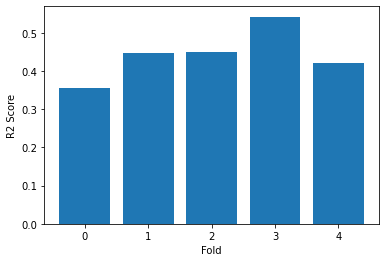

In [4]:
# Import the packages you'll need
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt


# Create the kf object
kf = KFold(n_splits=5)

# Initialize
r2_score_list = []
# loop
coef_list = []
for train_ind, valid_ind in kf.split(d_data_train, d_label_train):
    # Set your data/labels:
    train_data = d_data_train[train_ind,:]
    train_label = d_label_train[train_ind]
    valid_data = d_data_train[valid_ind, :]
    valid_label = d_label_train[valid_ind]
    
    # initialize your model
    mdl = LinearRegression()
    mdl.fit(train_data, train_label)
    coef_list.append(mdl.coef_)
    # Get score
    r2_score_list.append(mdl.score(valid_data, valid_label))

# Plot score
print(r2_score_list)
print('Mean R2: ' + str(np.mean(r2_score_list)))
plt.bar(np.arange(5),r2_score_list)
plt.xlabel('Fold')
plt.ylabel('R2 Score')

Notice the variation between each fold even though the structure of the model is the same. If two people were given shuffled versions of the set and neither did cross-validation, one would report an R2 score of `0.40` while the other would report `0.53`.

### K-fold Exercise 2 (Simplified!)

The previous exercise is intended to walk you through what is happening in K-fold cross-validation. In practice, it would be tedious to go through each of those steps. As a general rule: if you find yourself repeatedly doing something with `sklearn`, there's probably a helper function that will make your life easier.  
  
Since cross-validation is central to machine learning, there's a few helper functions to help you. For the previous example, we could use: `sklearn.model_selection.cross_val_score`.  
Let's take a look at its documentation; identify the parameters that will be useful for us, and see what the function returns.

In [5]:
import sklearn.model_selection
help(sklearn.model_selection.cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`

The parameters of interest for us are `estimator`, `X`, `y`, and `cv`. Using what you saw in the previous exercise, write the code needed for 5-fold cross-validation:  
1) Save the R2 score of each trained model.  
2) Print out the average score  
3) Plot the scores.  

[0.33261458 0.50527545 0.55507421 0.49637903 0.48935563]
0.4757397798822739


Text(0, 0.5, 'Estimator Score')

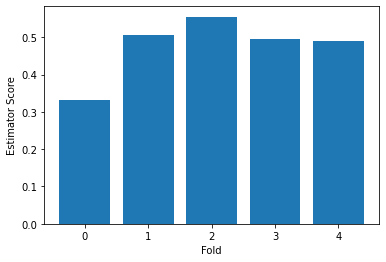

In [6]:
# Import the modules you'll need
from sklearn.model_selection import cross_val_score
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Get the data and split into train/test
d_data, d_label = sklearn.datasets.load_diabetes(return_X_y=True)
d_data_train, d_data_test, d_label_train, d_label_test = train_test_split(d_data, d_label, train_size=0.8)

# Initialize our model
mdl = LinearRegression()

score_list = cross_val_score(mdl, d_data_train, d_label_train, cv=5)
print(score_list)
print(np.mean(score_list))
plt.bar(np.arange(5), score_list)
plt.xlabel('Fold')
plt.ylabel('Estimator Score')

You'll probably notice that these results aren't the same as the ones we saw in the previous exercise. Why is that?

## Other cross-validation methods
There are other types of cross-validation. For example, "Leave-p-out cross-validation" selects `p` samples for validation, and trains the model on the remaining samples. At every iteration, a different set of `p` samples is selected. Iterations continue until all possible permutations are considered. In the extreme case where `p=1`, we're left with Leave-one-out cross-validation.
If we want to use a method of cross-validation that isn't K-fold, we just need to specify it in `cross_val_score` using the `cv` argument.

In [7]:
# Import the cross-validator you want to use
from sklearn.model_selection import LeavePOut
# Look at the documentation:
# help(LeaveOneOut)
# Initialize
leave_p_out = LeavePOut(2)

# NOTE:
# LeavePOut is unwieldy in practice since the number of permutations grows combinatorially (n choose p)
# with dataset size. For that reason, LeaveOneOut is 

# Replace the value for 'cv' by our cross-validator:
# score_list = cross_val_score([fill_this_in], cv=leave_p_out)
# print(len(score_list))

If you're looking to have behaviour similar to `LeavePOut` without the combinatorial issues, you can use `ShuffleSplit` in the same way:

In [8]:
# Import cross-validator
from sklearn.model_selection import ShuffleSplit

# Look at the docs
# help(ShuffleSplit)
shuff = ShuffleSplit(n_splits=100, train_size=0.8)

# score_list = cross_val_score( [fill this in], cv=shuff)
# print(score_list)

## Beyond Evaluation
Cross-validation is not only used to evaluate models. Its parent module, `model_selection`, hints at that. One of the reasons for splitting a dataset between training, validation, and testing sets is to avoid having the testing set implicitly inform our model parameters.  
  
Suppose you initialize a linear regression model with random coefficients, then compared them to one another. Simply by chance, some of them would have parameters that would make them perform better. Selecting one of these is a simple kind of training.  
  
In the previous exercises, we saw cross-validation used for the same type of models, but on different subsets of data. We can perform cross-validation across more than just parameter values; we could do it across different types of model and then select whichever model works best. We won't need to choose _a priori_ whether to use linear regression, a support vector regressor, or whether to take polynomials of our features. We can do cross-validation to compare the performance of these models and then select based on an objective measure of performance.

### Cross-validation wrap-up
At its core, cross-validation is simply about making sure that we evaluate our models fairly so that the performance we claim is accurate. With a fair comparison, we can empirically evaluate which models are best without having to worry about our own biases affecting our choices.